<a href="https://colab.research.google.com/github/wanermelon/EDA-on-Suicide-Rates/blob/main/Mei_Waner_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA blog post on medium

https://medium.com/@wmei/exploratory-data-analysis-eda-in-python-on-suicide-rates-33da65855add

Dataset can be found in the github repo - 

https://github.com/wanermelon/EDA-on-Suicide-Rates


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/wanermelon/EDA-on-Suicide-Rates/main/master.csv"
Suicide_rate = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe and defined as Suicide_rate

In [3]:
# Top 5 obs
Suicide_rate.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Checking the info/property of the dataset
Suicide_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# Check names for columns 
Suicide_rate.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
# Delete hidden spaces in column names
Suicide_rate = Suicide_rate.rename(columns={' gdp_for_year ($) ': 'gdp_for_year'})
Suicide_rate = Suicide_rate.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita'})

In [7]:
# Drop columns that's unnecessary for this EDA
Suicide_rate = Suicide_rate.drop(["country-year", "HDI for year","gdp_for_year"], axis=1)

In [8]:
# Drop duplicate
Suicide_rate = Suicide_rate.drop_duplicates(keep='first')

In [9]:
# Drop missing
Suicide_rate.dropna()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,2309,Generation Z


In [10]:
# Checking the new info/property of the dataset
Suicide_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   gdp_per_capita     27820 non-null  int64  
 8   generation         27820 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.1+ MB


In [11]:
# Find the unique values to make categorical variable
print('Country and States in United States')
print(", ".join(list(Suicide_rate.country.unique())))
print('Years')
print(*list(Suicide_rate.year.unique()))
print('Sex')
print(*list(Suicide_rate.sex.unique()))
print('Generation')
print(", ".join(list(Suicide_rate.generation.unique())))


Country and States in United States
Albania, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Barbados, Belarus, Belgium, Belize, Bosnia and Herzegovina, Brazil, Bulgaria, Cabo Verde, Canada, Chile, Colombia, Costa Rica, Croatia, Cuba, Cyprus, Czech Republic, Denmark, Dominica, Ecuador, El Salvador, Estonia, Fiji, Finland, France, Georgia, Germany, Greece, Grenada, Guatemala, Guyana, Hungary, Iceland, Ireland, Israel, Italy, Jamaica, Japan, Kazakhstan, Kiribati, Kuwait, Kyrgyzstan, Latvia, Lithuania, Luxembourg, Macau, Maldives, Malta, Mauritius, Mexico, Mongolia, Montenegro, Netherlands, New Zealand, Nicaragua, Norway, Oman, Panama, Paraguay, Philippines, Poland, Portugal, Puerto Rico, Qatar, Republic of Korea, Romania, Russian Federation, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and Grenadines, San Marino, Serbia, Seychelles, Singapore, Slovakia, Slovenia, South Africa, Spain, Sri Lanka, Suriname, Sweden, Switzerland, Thailand

In [12]:
# Only display numeric cloumns
Suicide_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.0,1995.00,2002.00,2008.00,2016.00
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.0,3.00,25.00,131.00,22338.00
population,27820.0,1.844794e+06,3.911779e+06,278.0,97498.50,430150.00,1486143.25,43805214.00
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.0,0.92,5.99,16.62,224.97
gdp_per_capita,27820.0,1.686646e+04,1.888758e+04,251.0,3447.00,9372.00,24874.00,126352.00


In [13]:
# Include numeric and non-numeric cloumns
Suicide_rate.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Iceland,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820,NaN,NaN,NaN,2001.26,8.46906,1985,1995,2002,2008,2016
sex,27820,2,male,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,55-74 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820,NaN,NaN,NaN,242.574,902.048,0,3,25,131,22338
population,27820,NaN,NaN,NaN,1.84479e+06,3.91178e+06,278,97498.5,430150,1.48614e+06,4.38052e+07
suicides/100k pop,27820,NaN,NaN,NaN,12.8161,18.9615,0,0.92,5.99,16.62,224.97
gdp_per_capita,27820,NaN,NaN,NaN,16866.5,18887.6,251,3447,9372,24874,126352
generation,27820,6,Generation X,6408,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# Analysis on Suicide_per_Hundred_K_Pop feature
Suicide_rate = Suicide_rate.rename(columns={'suicides/100k pop': 'Suicide_per_Hundred_K_Pop'})
Q1=Suicide_rate.Suicide_per_Hundred_K_Pop.quantile(.25)
Q3=Suicide_rate.Suicide_per_Hundred_K_Pop.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",Suicide_rate.Suicide_per_Hundred_K_Pop.min())
print("Max Value ",Suicide_rate.Suicide_per_Hundred_K_Pop.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)


Min Value 0.0
Max Value  224.97
Q1  0.92
Q3  16.62
IQR  15.700000000000001
lower_limit -22.63
upper_limit 40.17


In [15]:
# Functions of to analyze data
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

In [16]:
# Find outliers within Suicide_rate
Outliers_SR = findoutliers(Suicide_rate.Suicide_per_Hundred_K_Pop)

In [17]:
# Find number of rows that have outlier
print(len(Outliers_SR))

2046


Text(0, 0.5, 'Number of countries and states')

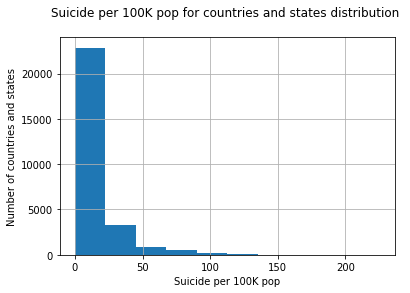

In [18]:
# A histogram including all the countries
hist_1 = Suicide_rate.Suicide_per_Hundred_K_Pop.hist()
hist_1.set_title('Suicide per 100K pop for countries and states distribution \n')
hist_1.set_xlabel('Suicide per 100K pop')
hist_1.set_ylabel('Number of countries and states')

In [19]:
# New feature "outlier"
if any( i in Outliers_SR for i in Suicide_rate['Suicide_per_Hundred_K_Pop'] ):
  Suicide_rate['outlier'] = "outlier"
else:
  Suicide_rate['outlier'] = "normal"

In [20]:
# Check updated datafrae
Suicide_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    27820 non-null  object 
 1   year                       27820 non-null  int64  
 2   sex                        27820 non-null  object 
 3   age                        27820 non-null  object 
 4   suicides_no                27820 non-null  int64  
 5   population                 27820 non-null  int64  
 6   Suicide_per_Hundred_K_Pop  27820 non-null  float64
 7   gdp_per_capita             27820 non-null  int64  
 8   generation                 27820 non-null  object 
 9   outlier                    27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [21]:
# Check if the new feature are in the dataframe
Suicide_rate.head()

,country,year,sex,age,suicides_no,population,Suicide_per_Hundred_K_Pop,gdp_per_capita,generation,outlier
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X,outlier
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent,outlier
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X,outlier
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation,outlier
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers,outlier


Text(0, 0.5, 'Number of countries and states')

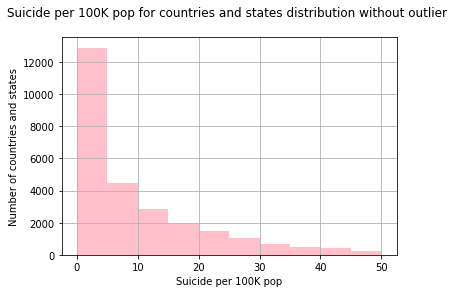

In [22]:
# A histogram excluding outliers
Suicide_rate_2 = Suicide_rate.Suicide_per_Hundred_K_Pop
for i in Suicide_rate_2:
  if any(Suicide_rate["outlier"]) == "outlier":
    Suicide_rate_2 = Suicide_rate_2.drop[i]
  else:
    Suicide_rate_2 = Suicide_rate_2

hist_2 = Suicide_rate_2.hist(color = "pink", lw=0, range=[0, 50])
hist_2.set_title('Suicide per 100K pop for countries and states distribution without outlier \n')
hist_2.set_xlabel('Suicide per 100K pop')
hist_2.set_ylabel('Number of countries and states')

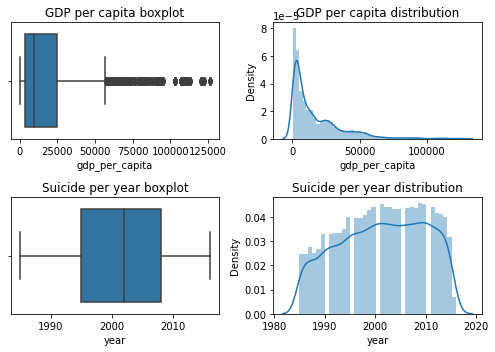

In [23]:
#boxplot and distribution on suicide rate and years

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,5))
axes[0,0].set_title('GDP per capita boxplot')
axes[0,1].set_title('GDP per capita distribution')
axes[1,0].set_title('Suicide per year boxplot')
axes[1,1].set_title('Suicide per year distribution')

sn.boxplot(Suicide_rate.gdp_per_capita, orient='v',ax=axes[0,0])
sn.distplot(Suicide_rate.gdp_per_capita,ax=axes[0,1]) 
sn.boxplot(Suicide_rate.year, orient='v',ax=axes[1,0])
sn.distplot(Suicide_rate.year,ax=axes[1,1]) 

fig.tight_layout();

## Categorical Variable Analysis

In [24]:
# Number of the unique values for each country
Suicide_rate.country.value_counts()

Iceland                   382
Netherlands               382
Mauritius                 382
Austria                   382
Luxembourg                372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [25]:
# in percentage
Suicide_rate.country.value_counts(normalize=True)

Iceland                   0.013731
Netherlands               0.013731
Mauritius                 0.013731
Austria                   0.013731
Luxembourg                0.013372
                            ...   
Bosnia and Herzegovina    0.000863
Dominica                  0.000431
Macau                     0.000431
Cabo Verde                0.000431
Mongolia                  0.000359
Name: country, Length: 101, dtype: float64

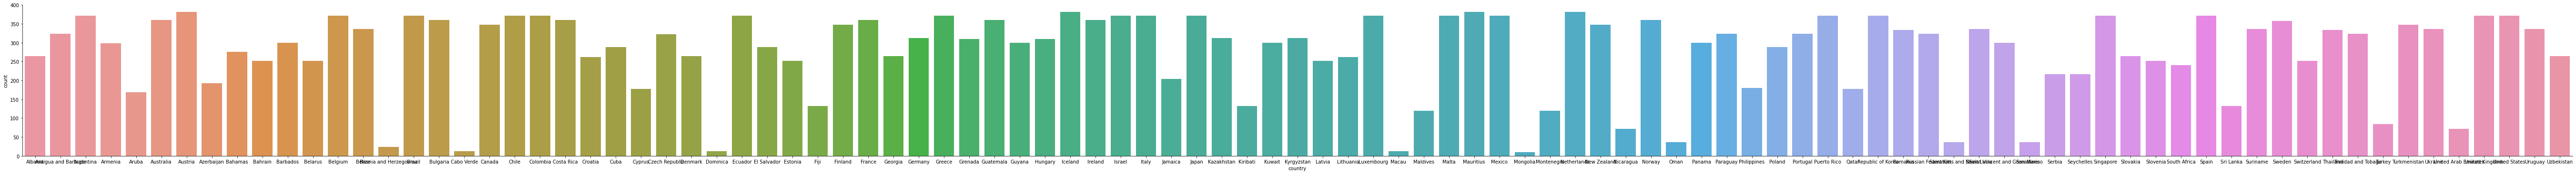

In [26]:
# Number of unique values collected per country in factorplot
pl = sn.factorplot('country',data=Suicide_rate, aspect=15, kind='count')
pl.set_xticklabels(step=1)

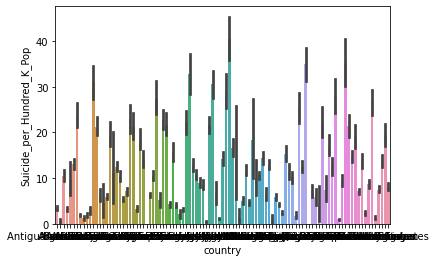

In [27]:
# Mean of suicide rate per country
sn.barplot(x=Suicide_rate.country,y=Suicide_rate.Suicide_per_Hundred_K_Pop)

### Bivariate Analysis

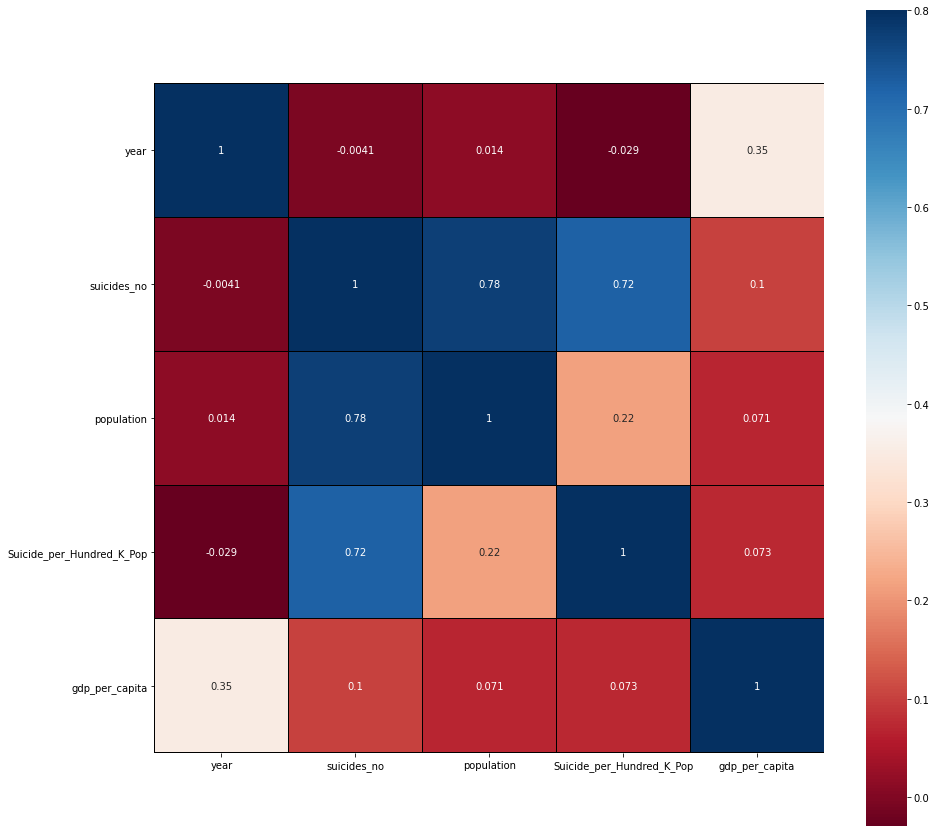

In [28]:
# Checking the correlation between differnt columns 
corr = Suicide_rate.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')

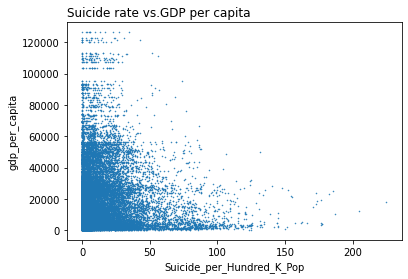

In [29]:
# scatter plot of Suicide per 100k and gdp per capita
plt.plot('Suicide_per_Hundred_K_Pop', 'gdp_per_capita', data=Suicide_rate, linestyle='', marker='o', markersize=0.5)
plt.xlabel('Suicide_per_Hundred_K_Pop')
plt.ylabel('gdp_per_capita')
plt.title('Suicide rate vs.GDP per capita', loc='left')
plt.show()

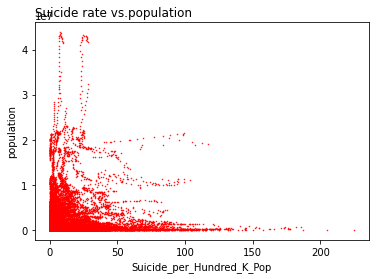

In [46]:
# scatter plot of Suicide per 100k and gdp per capita
plt.plot('Suicide_per_Hundred_K_Pop', 'population', data=Suicide_rate, linestyle='', marker='o', markersize=0.5, color = 'r')
plt.xlabel('Suicide_per_Hundred_K_Pop')
plt.ylabel('population')
plt.title('Suicide rate vs.population', loc='left')
plt.show()

SpearmanrResult(correlation=0.07306331576449537, pvalue=3.02415181882464e-34)


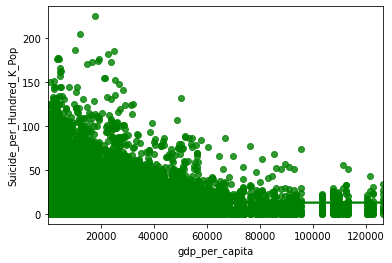

In [31]:
# p-value mean fo Suicide rate
# find correlation between GDP and Suicide rate
from scipy.stats import spearmanr
sn.regplot(x=Suicide_rate.gdp_per_capita, y=Suicide_rate.Suicide_per_Hundred_K_Pop, color='g')
print(spearmanr(Suicide_rate.gdp_per_capita,Suicide_rate.Suicide_per_Hundred_K_Pop))

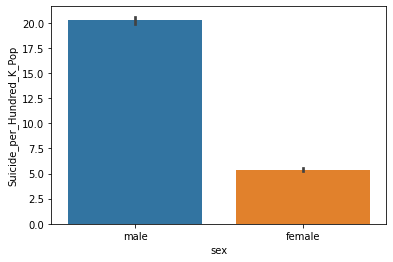

In [32]:
# bivariate analysis for independent variable being a category and dependent variable being a number
# mean value for each condition value
sn.barplot(x=Suicide_rate.sex,y=Suicide_rate.Suicide_per_Hundred_K_Pop)

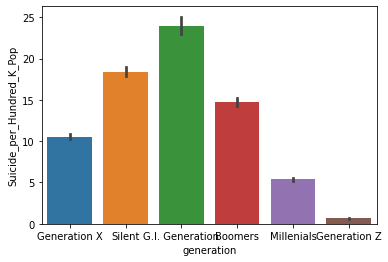

In [33]:
# bivariate analysis for independent variable being a category and dependent variable being a number
# mean value for each condition value
sn.barplot(x=Suicide_rate.generation,y=Suicide_rate.Suicide_per_Hundred_K_Pop)

In [34]:

print("Number of unique value",Suicide_rate.year.nunique())
print("Max  value",Suicide_rate.country.max())
print("Min  value",Suicide_rate.country.min())

Number of unique value 32
Max  value Uzbekistan
Min  value Albania


generation
Boomers            14.742094
G.I. Generation    23.946378
Generation X       10.556874
Generation Z        0.642299
Millenials          5.383597
Silent             18.418848
Name: Suicide_per_Hundred_K_Pop, dtype: float64


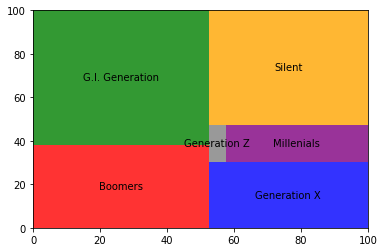

In [45]:
# Tree map for the distribution of generation in this data
!pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
a = Suicide_rate.groupby('generation')[['Suicide_per_Hundred_K_Pop']].mean().index.get_level_values(0).tolist()
d = Suicide_rate.groupby('generation')['Suicide_per_Hundred_K_Pop'].mean()
print(d)
color=['r','g','b','grey','purple','orange']
squarify.plot(sizes=d, label=a, color=color, alpha=.8)

plt.show()